# QuickSort Algorithm

In [74]:
from random import randint
from time import time
import matplotlib.pyplot as plt

In [75]:
def randomQuickSort(alist,first,last):
    steps = 0
    if first<last:
        pivIndex,steps = randomPartition(alist,first,last)
        steps = steps + randomQuickSort(alist,first,pivIndex-1)
        steps = steps + randomQuickSort(alist,pivIndex+1,last)
    return steps

In [76]:
def randomPartition(alist,first,last):
    steps = 0

    indxpiv = randint(first,last)
    temp = alist[indxpiv]
    alist[indxpiv] = alist[first]
    alist[first] = temp
   
    pivotvalue = alist[first]
    steps = 0

    leftmark = first+1
    rightmark = last
 
    done = False
 
    steps = steps + 9       #Counting
 
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
            steps = steps + 1
        steps = steps + 1   #While Last comparition

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1
            steps = steps + 1
        steps = steps + 1   #While Last comparition

        if rightmark < leftmark:
           done = True
           steps = steps + 1
        else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp
           steps = steps + 3
        steps = steps + 1

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp
    steps = steps + 3 + 1     #Last one is for last while comparition

    return rightmark,steps

In [77]:
def graphic(results):
    plt.ylabel('Index')
    plt.xlabel('Steps')
    plt.title('Distribution Plot')
    plt.bar(range(len(results)), results)
    plt.show()

In [78]:
def distribution(result):
    ys_pos = range(len(result.keys()))
    plt.ylabel('Amount')
    plt.xlabel('Steps')
    plt.title('Steps Distribution')
    plt.bar(ys_pos, result.values())
    plt.show()
        

In [79]:
def runQuickSort(A,n,results):
    start = time()
    for i in xrange(n):
        rta = randomQuickSort(A,0,len(A)-1)
        if rta in results:
            results[rta]=results[rta]+1
        else:
            results[rta]=1
        
        #results.append(randomQuickSort(A,0,len(A)-1))
    end = time()
    
    suma = 0
    for key in results:
        suma += key*results[key]
    average = suma/n
    
    print "N= {}\tTime= {:.4f} Seconds -> {:.4f} Hours".format(n,end-start,(end-start)/3600)
    print "Min Steps= {}\t Max Steps= {}".format(min(results),max(results))
    print "Average steps= {:.4f}".format(average)
    #graphic(results)
    distribution(results)

In [80]:
def runQuickSortinTime(A,results,duration):
    start = time()
    end = start
    n = 0
    while end-start<duration:
        rta = randomQuickSort(A,0,len(A)-1)
        if rta in results:
            results[rta]=results[rta]+1
        else:
            results[rta]=1
        n+=1
        #results.append(randomQuickSort(A,0,len(A)-1))
        end = time()
        
    suma = 0
    for key in results:
        suma += key*results[key]
    average = suma/n
    
    print "N= {}\tTime= {:.4f} Seconds -> {:.4f} Hours".format(n,end-start,(end-start)/3600)
    print "Min Steps= {}\t Max Steps= {}".format(min(results),max(results))
    print "Average steps= {:.4f}".format(average)
    #graphic(results)
    distribution(results)


El arreglo a usar es: [5, 6, 7, 8, 1, 2, 3, 4, 14, 15, 16, 9, 10, 11, 12, 13]
N= 10000000	Time= 475.1460 Seconds -> 0.1320 Hours
Min Steps= 174	 Max Steps= 343
Average steps= 226.0000


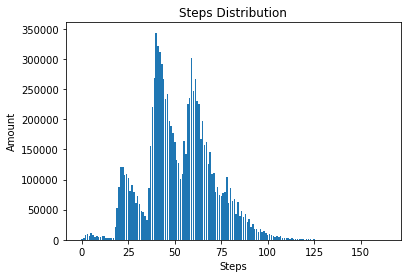

In [81]:
N = 10000000
ResultsA = {}
A = range(5,9)+range(1,5)+range(14,17)+range(9,14)
print "\nEl arreglo a usar es:", A
runQuickSort(A,N,ResultsA)

Para ordenar 10000000 de veces el mismo arreglo, se tardo 475 segundos (8 minutos) en hacerlo. El minimo numero de pasos para realizar un ordenamiento, fue de 174, y el mayor fue de 343, una diferencia de 169 pasos.

In [13]:
print "Tiempo de ejecucion promedio para cada ordenamiento: {} segundos".format(475.1460/10000000)

Tiempo de ejecucion promedio para cada ordenamiento: 4.75146e-05 segundos


Mediante regla de 3 se calcula cuantas ejecuciones se harian en 18000 segundos o 5 horas.

In [14]:
estimado = ( 18000.0 * 10000000.0 ) / 475.1460
print "Estimado: {}".format(estimado)

Estimado: 378830927.757


Como cantidad estimada se obtiene un numero cercano a los 4 mil millones. Luego corro el quicksort por 5 horas:


El arreglo a usar es: [5, 6, 7, 8, 1, 2, 3, 4, 14, 15, 16, 9, 10, 11, 12, 13]
N= 338833508	Time= 18000.0000 Seconds -> 5.0000 Hours
Min Steps= 174	 Max Steps= 375
Average steps= 226.0000


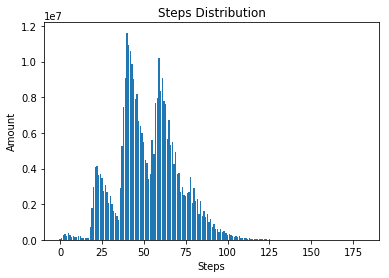

En 5 horas la cantidad de veces que realiza el quicksort esta dentro de las cifras de 3 mil millones. La diferencia con el valor predicho es:

In [15]:
print "Diferencia: {} -> {:.2f} %".format(abs(338833508-estimado),abs(338833508-estimado)/estimado)

Diferencia: 39997419.7569 -> 0.11 %


La diferencia entre la cantidad obtenida del experimento y la predicha, varia 0.11%.

En las Graficas se aprecia la distribucion de los pasos necesarios para resolverlo, las etiquetas de los valores no estan dentro de las graficas debido a que existe una gran cantidad, por lo que quedarian muy solapadas entre si haciendose menos entendible la grafica.